In [ ]:
# 시작하기 전에 돌리시고 런타임> 런타임다시시작 을 클릭하세요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

## 2.2 간단한 예시

In [1]:
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
titanic = titanic.drop(columns=['adult_male','embark_town','class','alive','alone'])

In [3]:
titanic.head(8) #head

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck
0,0,3,male,22.0,1,0,7.2500,S,man,NaN
1,1,1,female,38.0,1,0,71.2833,C,woman,C
2,1,3,female,26.0,0,0,7.9250,S,woman,NaN
3,1,1,female,35.0,1,0,53.1000,S,woman,C
4,0,3,male,35.0,0,0,8.0500,S,man,NaN
5,0,3,male,NaN,0,0,8.4583,Q,man,NaN
6,0,1,male,54.0,0,0,51.8625,S,man,E
7,0,3,male,2.0,3,1,21.0750,S,child,NaN


In [4]:
titanic.tail(8) #tail

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck
883,0,2,male,28.0,0,0,10.500,S,man,NaN
884,0,3,male,25.0,0,0,7.050,S,man,NaN
885,0,3,female,39.0,0,5,29.125,Q,woman,NaN
886,0,2,male,27.0,0,0,13.000,S,man,NaN
887,1,1,female,19.0,0,0,30.000,S,woman,B
888,0,3,female,NaN,1,2,23.450,S,woman,NaN
889,1,1,male,26.0,0,0,30.000,C,man,C
890,0,3,male,32.0,0,0,7.750,Q,man,NaN


In [5]:
titanic.dtypes #속성

survived       int64
pclass         int64
sex           object
age          float64
sibsp          int64
parch          int64
fare         float64
embarked      object
who           object
deck        category
dtype: object

In [6]:
titanic.info() #요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   who       891 non-null    object  
 9   deck      203 non-null    category
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 64.0+ KB


## 2.3 슬라이싱

#### 열선택

In [11]:
# 열선택
titanic["age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [7]:
type(titanic["age"]) # Series

pandas.core.series.Series

In [8]:
len(titanic["age"]) # 갯수

891

In [9]:
titanic[["age", "sex"]] # 2개 열선택

,age,sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
...,...,...
886,27.0,male
887,19.0,female
888,NaN,female
889,26.0,male


In [10]:
titanic.sex # 1개의 열선택

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

#### 행선택

In [12]:
titanic[titanic["age"] > 35] # 조건에 맞는 행 선택

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck
1,1,1,female,38.0,1,0,71.2833,C,woman,C
6,0,1,male,54.0,0,0,51.8625,S,man,E
11,1,1,female,58.0,0,0,26.5500,S,woman,C
13,0,3,male,39.0,1,5,31.2750,S,man,NaN
15,1,2,female,55.0,0,0,16.0000,S,woman,NaN
...,...,...,...,...,...,...,...,...,...,...
865,1,2,female,42.0,0,0,13.0000,S,woman,NaN
871,1,1,female,47.0,1,1,52.5542,S,woman,D
873,0,3,male,47.0,0,0,9.0000,S,man,NaN
879,1,1,female,56.0,0,1,83.1583,C,woman,C


In [13]:
titanic["age"] > 35

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: age, Length: 891, dtype: bool

In [14]:
titanic[titanic["pclass"].isin([2, 3])]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck
0,0,3,male,22.0,1,0,7.2500,S,man,NaN
2,1,3,female,26.0,0,0,7.9250,S,woman,NaN
4,0,3,male,35.0,0,0,8.0500,S,man,NaN
5,0,3,male,NaN,0,0,8.4583,Q,man,NaN
7,0,3,male,2.0,3,1,21.0750,S,child,NaN
...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,man,NaN
885,0,3,female,39.0,0,5,29.1250,Q,woman,NaN
886,0,2,male,27.0,0,0,13.0000,S,man,NaN
888,0,3,female,NaN,1,2,23.4500,S,woman,NaN


In [15]:
titanic[titanic["pclass"].isin([2, 3])]["pclass"].value_counts() # 확인해보기

pclass
3    491
2    184
Name: count, dtype: int64

In [16]:
titanic[(titanic["pclass"] == 2) | (titanic["pclass"] == 3)] # 다른방법

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck
0,0,3,male,22.0,1,0,7.2500,S,man,NaN
2,1,3,female,26.0,0,0,7.9250,S,woman,NaN
4,0,3,male,35.0,0,0,8.0500,S,man,NaN
5,0,3,male,NaN,0,0,8.4583,Q,man,NaN
7,0,3,male,2.0,3,1,21.0750,S,child,NaN
...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,man,NaN
885,0,3,female,39.0,0,5,29.1250,Q,woman,NaN
886,0,2,male,27.0,0,0,13.0000,S,man,NaN
888,0,3,female,NaN,1,2,23.4500,S,woman,NaN


#### 행과 열선택

In [17]:
titanic.loc[titanic.survived==1, "sex"]

1      female
2      female
3      female
8      female
9      female
        ...  
875    female
879    female
880    female
887    female
889      male
Name: sex, Length: 342, dtype: object

In [18]:
titanic.iloc[0,0]

0

In [19]:
titanic.iloc[4,3]

35.0

In [21]:
titanic.iloc[3,1:3]

pclass         1
sex       female
Name: 3, dtype: object

In [22]:
titanic.iloc[:,2]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [23]:
titanic.iloc[9:15, 2:5]

,sex,age,sibsp
9,female,14.0,1
10,female,4.0,1
11,female,58.0,0
12,male,20.0,0
13,male,39.0,1
14,female,14.0,0


## 2.4 데이터 핸들링

In [25]:
titanic.sort_values(by='fare', ascending=False) # 정렬

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck
271,1,3,male,25.0,0,0,0.0000,S,man,NaN
597,0,3,male,49.0,0,0,0.0000,S,man,NaN
302,0,3,male,19.0,0,0,0.0000,S,man,NaN
633,0,1,male,NaN,0,0,0.0000,S,man,NaN
277,0,2,male,NaN,0,0,0.0000,S,man,NaN
...,...,...,...,...,...,...,...,...,...,...
438,0,1,male,64.0,1,4,263.0000,S,man,C
341,1,1,female,24.0,3,2,263.0000,S,woman,C
737,1,1,male,35.0,0,0,512.3292,C,man,B
258,1,1,female,35.0,0,0,512.3292,C,woman,NaN


In [26]:
titanic.sort_values(by=['pclass', 'fare'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck
263,0,1,male,40.0,0,0,0.00,S,man,B
633,0,1,male,NaN,0,0,0.00,S,man,NaN
806,0,1,male,39.0,0,0,0.00,S,man,A
815,0,1,male,NaN,0,0,0.00,S,man,B
822,0,1,male,38.0,0,0,0.00,S,man,NaN
...,...,...,...,...,...,...,...,...,...,...
201,0,3,male,NaN,8,2,69.55,S,man,NaN
324,0,3,male,NaN,8,2,69.55,S,man,NaN
792,0,3,female,NaN,8,2,69.55,S,woman,NaN
846,0,3,male,NaN,8,2,69.55,S,man,NaN


In [27]:
titanic.sort_values(by=['pclass', 'fare']).head(30)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck
263,0,1,male,40.0,0,0,0.0000,S,man,B
633,0,1,male,NaN,0,0,0.0000,S,man,NaN
806,0,1,male,39.0,0,0,0.0000,S,man,A
815,0,1,male,NaN,0,0,0.0000,S,man,B
822,0,1,male,38.0,0,0,0.0000,S,man,NaN
872,0,1,male,33.0,0,0,5.0000,S,man,B
662,0,1,male,47.0,0,0,25.5875,S,man,E
168,0,1,male,NaN,0,0,25.9250,S,man,NaN
796,1,1,female,49.0,0,0,25.9292,S,woman,D
862,1,1,female,48.0,0,0,25.9292,S,woman,D


In [28]:
titanic.rename(columns={'fare': '요금', 'pclass': '등급'}) # 열이름 변경

,survived,등급,sex,age,sibsp,parch,요금,embarked,who,deck
0,0,3,male,22.0,1,0,7.2500,S,man,NaN
1,1,1,female,38.0,1,0,71.2833,C,woman,C
2,1,3,female,26.0,0,0,7.9250,S,woman,NaN
3,1,1,female,35.0,1,0,53.1000,S,woman,C
4,0,3,male,35.0,0,0,8.0500,S,man,NaN
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man,NaN
887,1,1,female,19.0,0,0,30.0000,S,woman,B
888,0,3,female,NaN,1,2,23.4500,S,woman,NaN
889,1,1,male,26.0,0,0,30.0000,C,man,C


In [29]:
titanic[['age','fare']].describe() # 요약

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [33]:
titanic[["sex", "age"]].groupby("sex").mean() # 그룹화

,age
sex,
female,27.915709
male,30.726645


In [32]:
titanic.groupby("sex")["age"].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [34]:
titanic.groupby(["sex", "pclass"])["fare"].mean()

sex     pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: fare, dtype: float64

In [35]:
  titanic["pclass"].value_counts() # 카테고리별 레코드 수 계산

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [36]:
titanic.groupby("pclass")["pclass"].count()

pclass
1    216
2    184
3    491
Name: pclass, dtype: int64

In [37]:
titanic.groupby("who")["who"].count()

who
child     83
man      537
woman    271
Name: who, dtype: int64

In [38]:
pd.crosstab(titanic['who'],titanic['pclass'])

pclass,1,2,3
who,,,
child,6,19,58
man,119,99,319
woman,91,66,114


## 2.5 데이터프레임 추가

In [40]:
# 첫 번째 데이터프레임: 학생 성적 데이터
df_grades = pd.DataFrame({
      'Student_ID': [1, 2, 3, 4],
      'Name': ['Alice', 'Bob', 'Charlie', 'David'],
      'Math': [85, 92, 78, 88],
      'English': [90, 85, 95, 80]
})
df_grades

,Student_ID,Name,Math,English
0,1,Alice,85,90
1,2,Bob,92,85
2,3,Charlie,78,95
3,4,David,88,80


In [41]:
df_grades.assign(Total=df_grades['Math'] + df_grades['English']) # assign()

,Student_ID,Name,Math,English,Total
0,1,Alice,85,90,175
1,2,Bob,92,85,177
2,3,Charlie,78,95,173
3,4,David,88,80,168


In [44]:
# 새로운 학생 성적 데이터
df_grades_2 = pd.DataFrame({
    'Student_ID': [5, 6, 7, 8],
    'Name': ['Eva', 'Frank', 'Grace', 'Hannah'],
    'Math': [91, 87, 84, 79],
    'English': [89, 93, 88, 85]
})
df_grades_2

,Student_ID,Name,Math,English
0,5,Eva,91,89
1,6,Frank,87,93
2,7,Grace,84,88
3,8,Hannah,79,85


In [45]:
pd.concat([df_grades, df_grades_2], ignore_index=True)

,Student_ID,Name,Math,English
0,1,Alice,85,90
1,2,Bob,92,85
2,3,Charlie,78,95
3,4,David,88,80
4,5,Eva,91,89
5,6,Frank,87,93
6,7,Grace,84,88
7,8,Hannah,79,85


In [47]:
pd.concat([df_grades, df_grades_2], ignore_index=False)

,Student_ID,Name,Math,English
0,1,Alice,85,90
1,2,Bob,92,85
2,3,Charlie,78,95
3,4,David,88,80
0,5,Eva,91,89
1,6,Frank,87,93
2,7,Grace,84,88
3,8,Hannah,79,85


## 2.6 데이터프레임 결합

In [48]:
# 두 번째 데이터프레임: 학생 동아리 활동 데이터
df_clubs = pd.DataFrame({
      'Student_ID': [1, 2, 4, 5],
      'Name': ['Alice', 'Bob', 'David', 'Eva'],
      'Club': ['Science', 'Math', 'Drama', 'Art']
})
df_clubs

,Student_ID,Name,Club
0,1,Alice,Science
1,2,Bob,Math
2,4,David,Drama
3,5,Eva,Art


In [49]:
pd.merge(df_grades, df_clubs, on="Name", how='left')

,Student_ID_x,Name,Math,English,Student_ID_y,Club
0,1,Alice,85,90,1.0,Science
1,2,Bob,92,85,2.0,Math
2,3,Charlie,78,95,NaN,NaN
3,4,David,88,80,4.0,Drama


## 2.7 날짜 계산

In [51]:
 time = pd.DataFrame({
      'employee_id': [1, 2, 3],
      'start_date': ['2020-01-15', '2019-06-01', '2018-03-22'],
      'end_date': ['2021-07-10', '2021-06-30', '2020-08-15']
})
 time

,employee_id,start_date,end_date
0,1,2020-01-15,2021-07-10
1,2,2019-06-01,2021-06-30
2,3,2018-03-22,2020-08-15


In [52]:
time.dtypes

employee_id     int64
start_date     object
end_date       object
dtype: object

In [54]:
time['start_date'] = pd.to_datetime(time['start_date'])
time['end_date'] = pd.to_datetime(time['end_date'])
time.dtypes

employee_id             int64
start_date     datetime64[ns]
end_date       datetime64[ns]
dtype: object

In [55]:
time['days_worked'] = (time['end_date'] - time['start_date']).dt.days
time

,employee_id,start_date,end_date,days_worked
0,1,2020-01-15,2021-07-10,542
1,2,2019-06-01,2021-06-30,760
2,3,2018-03-22,2020-08-15,877


In [56]:
time['months_worked'] = time['days_worked']/30.42
time

,employee_id,start_date,end_date,days_worked,months_worked
0,1,2020-01-15,2021-07-10,542,17.817226
1,2,2019-06-01,2021-06-30,760,24.983563
2,3,2018-03-22,2020-08-15,877,28.829717


In [63]:
time1 = pd.DataFrame({
    '년': [2020, 2021, 2022],
    '월': [10, 12, 3]
})
time1.dtypes

년    int64
월    int64
dtype: object

In [64]:
time1['년월'] = time1['년'].astype(str) + '-' + time1['월'].astype(str)
time1['년월'] = pd.to_datetime(time1['년월'])
time1

,년,월,년월
0,2020,10,2020-10-01
1,2021,12,2021-12-01
2,2022,3,2022-03-01


# 3 실습

In [65]:
from google.colab import files
uploaded = files.upload()

Saving pswci2_05_long.csv to pswci2_05_long.csv


In [75]:
import numpy as np
import pandas as pd
df = pd.read_csv('pswci2_05_long.csv', encoding = 'cp949')

<ipython-input-75-f907343cff6d>:3: DtypeWarning: Columns (61,67,73,79,85,91,97,103,109,115,121,184,186,195,197,206,208,217,219,228,230,239,241,249,251,256,264,266,270,276,291,305,312,317,327,387,391,396,455,459,514,516,520,525,539,549,615,622,624,635,644,685,689,698,703,711,714,782,787,794,804,837,840,842,844,857,870,872,876,878,882,884,913,944,946,982,1020,1025,1031,1059,1061,1070,1107,1120,1121,1123,1128,1132,1163,1171,1175,1177,1198,1201,1202,1208,1233,1239,1241,1250,1252,1267,1274,1276,1298,1300,1322,1324,1493,1522,1527,1533,1535,1539,1541,1547,1549,1551,1553,1555,1624,1626,1628,1888,1890,1913,1915) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pswci2_05_long.csv', encoding = 'cp949')


## 3.1 전처리

In [76]:
df.head(3)

,pid,p,wave,nonresponse,workperiod14,accident,injurytype,injurypart,con16,acc1,...,I009001,I009002,I009003,I010001,I010002,I010003,I011001,I011001t,I012001,I012001t
0,1,2,5,2.0,7,1,1,9,6,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,4,1.0,7,1,1,9,6,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,3,6.0,7,1,1,9,6,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# 1-1
# wave가 1이고 E2002001가 NaN이 아닌 행 선택
condition_wave_1_not_nan = (df['wave'] == 1) & (df['E2002002'].notna())
selected_wave_1_not_nan = df[condition_wave_1_not_nan]

In [78]:
condition_wave_1_not_nan

0        False
1        False
2        False
3        False
4        False
         ...  
16465    False
16466    False
16467    False
16468    False
16469    False
Length: 16470, dtype: bool

In [79]:
selected_wave_1_not_nan

,pid,p,wave,nonresponse,workperiod14,accident,injurytype,injurypart,con16,acc1,...,I009001,I009002,I009003,I010001,I010002,I010003,I011001,I011001t,I012001,I012001t
54,11,1,1,NaN,1,1,8,11,6,2013,...,2.0,NaN,NaN,2.0,NaN,NaN,5.0,NaN,3.0,NaN
74,15,1,1,NaN,11,1,1,11,5,2015,...,2.0,NaN,NaN,2.0,NaN,NaN,5.0,NaN,1.0,NaN
79,16,1,1,NaN,7,1,14,9,6,2004,...,2.0,NaN,NaN,2.0,NaN,NaN,5.0,NaN,1.0,NaN
489,98,1,1,NaN,9,1,4,7,3,2017,...,1.0,1000.0,NaN,1.0,50.0,NaN,3.0,NaN,2.0,NaN
519,104,1,1,NaN,7,1,1,11,2,2016,...,1.0,NaN,6.0,1.0,20.0,NaN,5.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16394,3279,1,1,NaN,12,1,1,7,1,2016,...,2.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,1.0,NaN
16404,3281,1,1,NaN,2,1,1,11,2,2016,...,2.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,2.0,NaN
16414,3283,1,1,NaN,12,1,1,6,2,2016,...,2.0,NaN,NaN,1.0,350.0,NaN,5.0,NaN,3.0,NaN
16439,3288,1,1,NaN,9,1,1,8,1,2016,...,2.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,1.0,NaN


In [80]:
# 1-2
selected_pids = selected_wave_1_not_nan['pid']

In [81]:
# 1-3
# 조건을 만족하는 pid에서 wave가 1과 2인 행 선택
condition_wave_1_and_2 = df['pid'].isin(selected_pids) & df['wave'].isin([1, 2])
result = df[condition_wave_1_and_2]

In [82]:
# 1-4
# 더미변수 만들기 유지되면 1 아니면 0
result.loc[:,'고용유지'] = np.where(result['F001003'].isna(), 1, 0)

<ipython-input-82-c497f83f7c04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[:,'고용유지'] = np.where(result['F001003'].isna(), 1, 0)


In [ ]:
result[['pid','고용유지']]

In [83]:
# 2-1
# NaN 부분 2019년 11월로 대체
result.loc[result['F001003'].isna(), ['F001002','F001003']] = [2019, 11]

In [84]:
# 2-2
result[['pid','wave','E2002001','E2002002','F001002','F001003','고용유지']]

,pid,wave,E2002001,E2002002,F001002,F001003,고용유지
53,11,2,NaN,NaN,2019.0,11.0,1
54,11,1,2018.0,1.0,2013.0,11.0,0
73,15,2,NaN,NaN,2019.0,11.0,1
74,15,1,2018.0,8.0,2017.0,10.0,0
78,16,2,NaN,NaN,2019.0,11.0,1
...,...,...,...,...,...,...,...
16414,3283,1,2017.0,12.0,2017.0,1.0,0
16438,3288,2,NaN,NaN,2019.0,11.0,1
16439,3288,1,2017.0,12.0,2016.0,12.0,0
16443,3289,2,2019.0,3.0,2018.0,11.0,0


In [85]:
#wave가 1인 df1, wave가 2인 df2
df1 = result[result.wave == 1]
df2 = result[result.wave == 2]

In [86]:
# 2-3
df1.E2002001 = df1['E2002001'].astype(int).astype(str)
df1.E2002002 = df1['E2002002'].astype(int).astype(str)

<ipython-input-86-b5f9ff98864e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.E2002001 = df1['E2002001'].astype(int).astype(str)
<ipython-input-86-b5f9ff98864e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.E2002002 = df1['E2002002'].astype(int).astype(str)


In [87]:
df1['재취업_입사일'] = df1['E2002001'] + '-' + df1['E2002002']

<ipython-input-87-cf1dec4ff2a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['재취업_입사일'] = df1['E2002001'] + '-' + df1['E2002002']


In [88]:
df1['재취업_입사일'] = pd.to_datetime(df1['재취업_입사일'])

<ipython-input-88-4291a1a21622>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['재취업_입사일'] = pd.to_datetime(df1['재취업_입사일'])


In [89]:
df2['F001002'] = df2['F001002'].astype(int).astype(str)
df2['F001003'] = df2['F001003'].astype(int).astype(str)
df2['재취업_퇴사일'] = df2['F001002'] + '-' + df2['F001003']
df2['재취업_퇴사일'] = pd.to_datetime(df2['재취업_퇴사일'])

<ipython-input-89-80383725d966>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['F001002'] = df2['F001002'].astype(int).astype(str)
<ipython-input-89-80383725d966>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['F001003'] = df2['F001003'].astype(int).astype(str)
<ipython-input-89-80383725d966>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [90]:
# 2-4
df3 = pd.merge(df1,df2[['pid','고용유지','재취업_퇴사일']], on='pid', how='outer')
df3[['고용유지_y','재취업_입사일','재취업_퇴사일']]

,고용유지_y,재취업_입사일,재취업_퇴사일
0,1,2018-01-01,2019-11-01
1,1,2018-08-01,2019-11-01
2,1,2017-06-01,2019-11-01
3,1,2018-06-01,2019-11-01
4,1,2017-06-01,2019-11-01
...,...,...,...
973,1,2017-11-01,2019-11-01
974,1,2018-03-01,2019-11-01
975,0,2017-12-01,2019-06-01
976,1,2017-12-01,2019-11-01


In [92]:
# 2-5
df3['근속기간(일)'] = (df3['재취업_퇴사일'] - df3['재취업_입사일']).dt.days
df3['근속기간(개월)'] = (df3['근속기간(일)']/30.42).round()
df3[['pid','재취업_입사일','재취업_퇴사일','근속기간(일)','근속기간(개월)']]

,pid,재취업_입사일,재취업_퇴사일,근속기간(일),근속기간(개월)
0,11,2018-01-01,2019-11-01,669,22.0
1,15,2018-08-01,2019-11-01,457,15.0
2,16,2017-06-01,2019-11-01,883,29.0
3,98,2018-06-01,2019-11-01,518,17.0
4,104,2017-06-01,2019-11-01,883,29.0
...,...,...,...,...,...
973,3279,2017-11-01,2019-11-01,730,24.0
974,3281,2018-03-01,2019-11-01,610,20.0
975,3283,2017-12-01,2019-06-01,547,18.0
976,3288,2017-12-01,2019-11-01,700,23.0


In [93]:
# 각 열에 NaN 값이 없는지 여부를 확인
non_nan_columns = df3.columns[df3.isna().sum() == 0]
df4 = df3[non_nan_columns]
df4.isnull().values.any() # NaN 값이 있으면 True, 없으면 False

False

# 시각화

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'

## 4.1 Seaborn

In [94]:
import seaborn as sns
pd.set_option('mode.chained_assignment', None)
sns.set_theme(style = 'whitegrid')

In [95]:
df = df4
cols = {'col' : ['pid', '고용유지_y', '재취업_입사일', '재취업_퇴사일', '근속기간(개월)',
                 'E2001002', 'E2007003', 'E2008001', 'E2019001', 'gender',
                 'age4', 'accident', 'injurypart', 'con16', 'area6'],
        'name' : ['응답자ID', '고용유지_여부', '재취업_입사일', '재취업_퇴사일', '근속기간(개월)',
                  '산업분류', '직업분류', '종사상지위', '월평균임금', '성별',
                  '연령대', '사고여부', '상해부위', '요양기간', '권역']}
df = df[cols['col']]
df.columns = cols['name']
df

,응답자ID,고용유지_여부,재취업_입사일,재취업_퇴사일,근속기간(개월),산업분류,직업분류,종사상지위,월평균임금,성별,연령대,사고여부,상해부위,요양기간,권역
0,11,1,2018-01-01,2019-11-01,22.0,15.0,3.0,2.0,150.0,1,2.0,1,11,6,2.0
1,15,1,2018-08-01,2019-11-01,15.0,3.0,2.0,2.0,60.0,1,2.0,1,11,5,2.0
2,16,1,2017-06-01,2019-11-01,29.0,19.0,2.0,1.0,61.0,1,2.0,1,9,6,2.0
3,98,1,2018-06-01,2019-11-01,17.0,6.0,8.0,3.0,250.0,1,1.0,1,7,3,3.0
4,104,1,2017-06-01,2019-11-01,29.0,3.0,9.0,1.0,430.0,1,1.0,1,11,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,3279,1,2017-11-01,2019-11-01,24.0,3.0,9.0,1.0,170.0,2,4.0,1,7,1,2.0
974,3281,1,2018-03-01,2019-11-01,20.0,15.0,9.0,2.0,27.0,2,4.0,1,11,2,1.0
975,3283,0,2017-12-01,2019-06-01,18.0,17.0,4.0,3.0,170.0,2,4.0,1,6,2,3.0
976,3288,1,2017-12-01,2019-11-01,23.0,9.0,9.0,1.0,150.0,2,4.0,1,8,1,4.0


In [96]:
df['산업분류'] = df['산업분류'].astype(int)
df['직업분류'] = df['직업분류'].astype(int)
df['종사상지위'] = df['종사상지위'].astype(int)
df['연령대'] = df['연령대'].astype(int)
df['권역'] = df['권역'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   응답자ID     978 non-null    int64         
 1   고용유지_여부   978 non-null    int64         
 2   재취업_입사일   978 non-null    datetime64[ns]
 3   재취업_퇴사일   978 non-null    datetime64[ns]
 4   근속기간(개월)  978 non-null    float64       
 5   산업분류      978 non-null    int64         
 6   직업분류      978 non-null    int64         
 7   종사상지위     978 non-null    int64         
 8   월평균임금     978 non-null    float64       
 9   성별        978 non-null    int64         
 10  연령대       978 non-null    int64         
 11  사고여부      978 non-null    int64         
 12  상해부위      978 non-null    int64         
 13  요양기간      978 non-null    int64         
 14  권역        978 non-null    int64         
dtypes: datetime64[ns](2), float64(2), int64(11)
memory usage: 114.7 KB


## 4.2 Countplot

<ipython-input-99-4a52a8346a45>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='권역', data = df, palette = 'pastel')


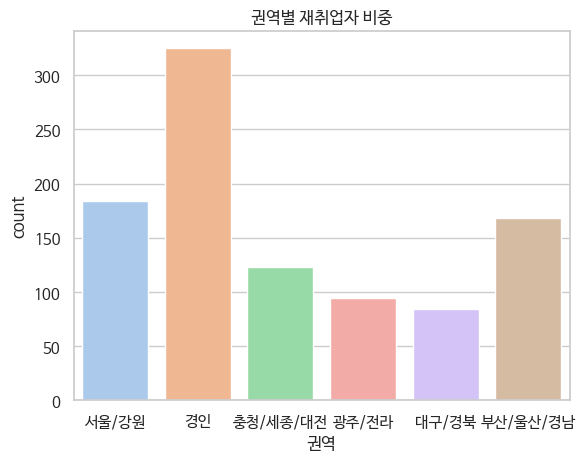

In [99]:
ax = sns.countplot(x='권역', data = df, palette = 'pastel')
ax.set_title('권역별 재취업자 비중') # 그래프 제목 추가
ax.set_xticks(range(0,6,1),
              labels = ['서울/강원', '경인', '충청/세종/대전', '광주/전라', '대구/경북', '부산/울산/경남']) # X축 눈금 변경
plt.show()

<ipython-input-100-883fce7cd626>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='상해부위', data = df, palette='hls')


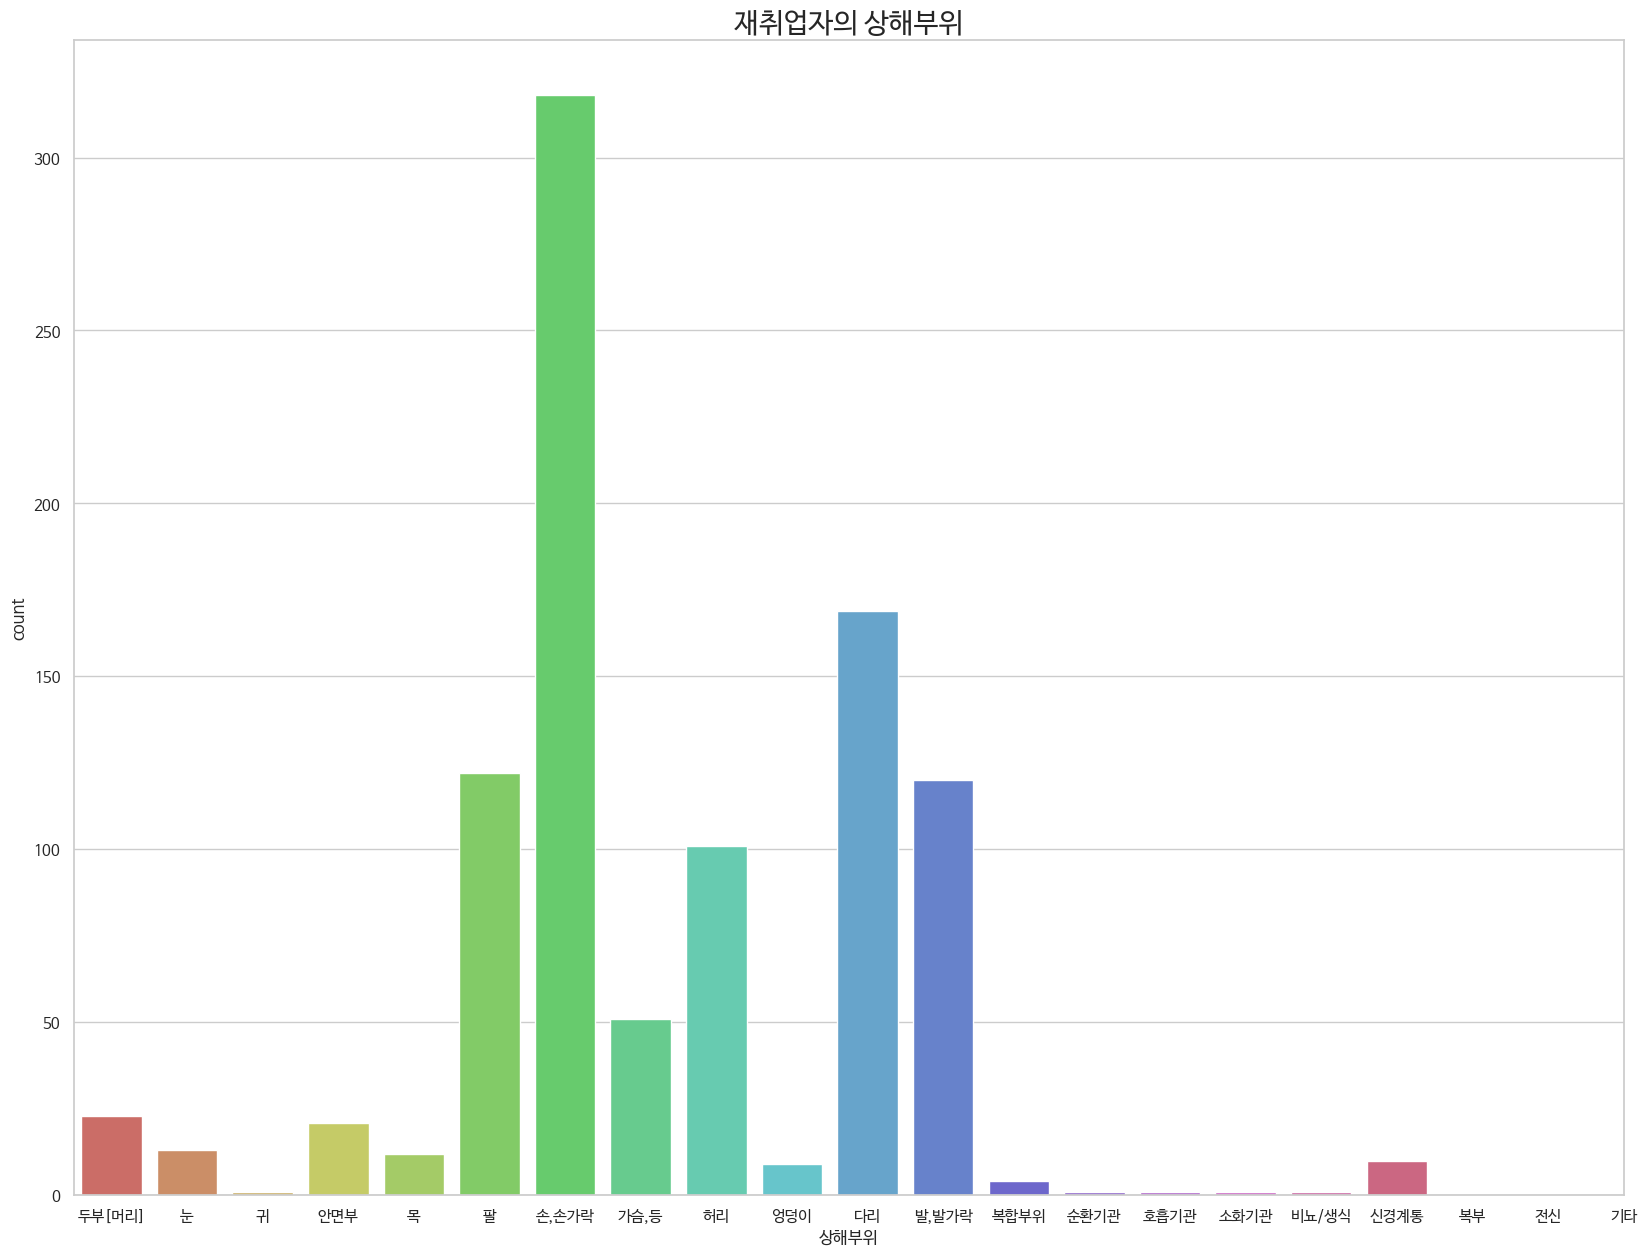

In [100]:
fig = plt.figure(figsize=(20, 15))
ax = sns.countplot(x='상해부위', data = df, palette='hls')
ax.set_title('재취업자의 상해부위',fontsize=20) # 그래프 제목 추가
ax.set_xticks(range(0, 21, 1),
              labels = ['두부[머리]', '눈', '귀', '안면부', '목', '팔', '손,손가락','가슴,등',
                        '허리','엉덩이','다리','발,발가락','복합부위','순환기관','호흡기관',
                        '소화기관','비뇨/생식','신경계통','복부','전신','기타']) # X축 눈금 변경
plt.show()

In [102]:
labels_1 = ['두부[머리]', '눈', '귀', '안면부', '목', '팔', '손,손가락','가슴,등', '허리','엉덩이','다리','발,발가락','복합부위','순환기관','호흡기관', '소화기관','비뇨/생식','신경계통','복부','전신','기타'] # X축 눈금 변경

<ipython-input-105-2df2f2644175>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='상해부위', data = df, orient='h', palette='rocket')


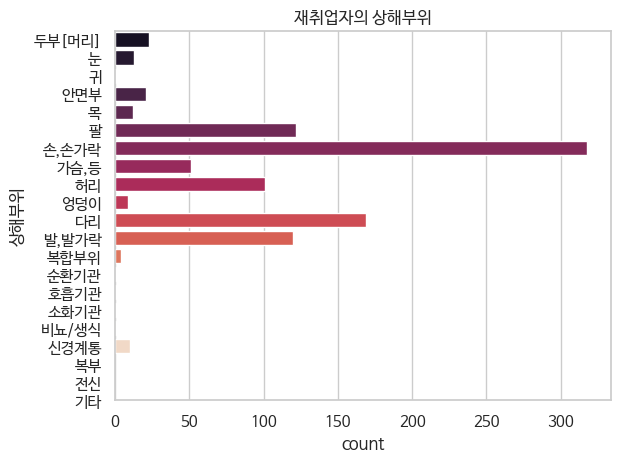

In [105]:
ax = sns.countplot(y='상해부위', data = df, orient='h', palette='rocket')
ax.set_title('재취업자의 상해부위') # 그래프 제목 추가
ax.set_yticks(range(0, 21, 1), labels = labels_1) # Y축 눈금 변경
plt.show()

## Barplot

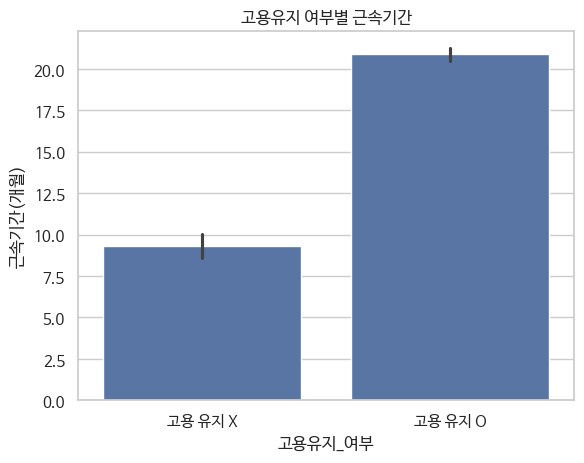

In [106]:
ax = sns.barplot(x = '고용유지_여부', y = '근속기간(개월)', data = df)
ax.set_title('고용유지 여부별 근속기간') # 그래프 제목 추가
ax.set_xticks([0, 1], labels = ['고용 유지 X', '고용 유지 O']) # X축 눈금 변경
plt.show()

<ipython-input-107-fb202c9eca02>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = '고용유지_여부', y = '월평균임금', data = df,


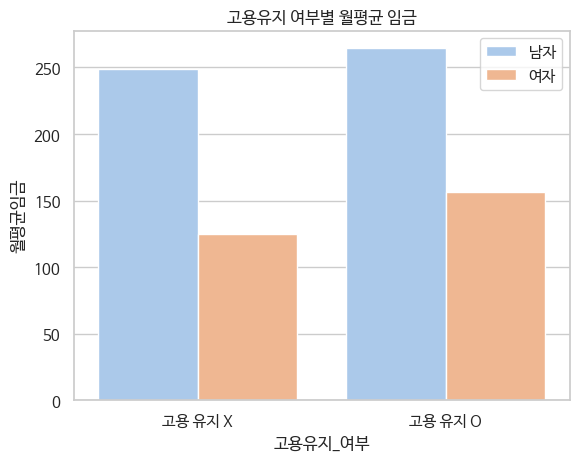

In [107]:
ax = sns.barplot(x = '고용유지_여부', y = '월평균임금', data = df,
                 hue = '성별', palette = 'pastel', ci=None) # palette 변경
ax.set_title('고용유지 여부별 월평균 임금') # 그래프 제목 추가
ax.set_xticks([0, 1], labels = ['고용 유지 X', '고용 유지 O']) # X축 눈금 변경
# 범례 변경
ax.legend(labels= ['남자', '여자'])
plt.show()

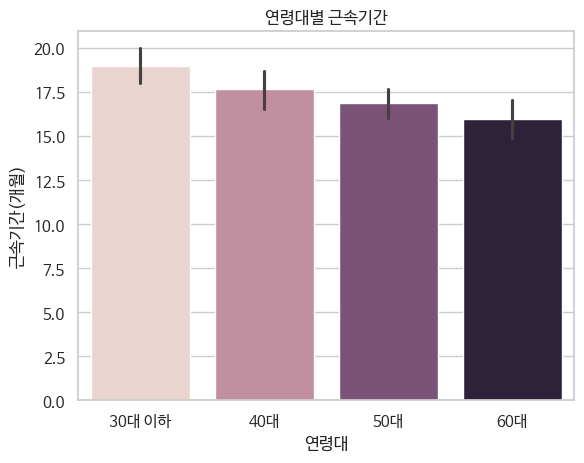

In [109]:
ax = sns.barplot(x = '연령대', y = '근속기간(개월)', data = df, hue = '연령대', legend = False)
ax.set_title('연령대별 근속기간') # 그래프 제목 추가
ax.set_xticks([0, 1, 2, 3], labels = ['30대 이하', '40대', '50대', '60대']) # X축 눈금 변경
plt.show()

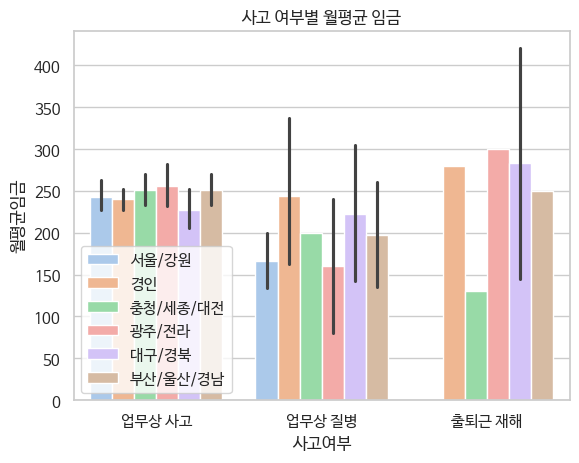

In [110]:
ax = sns.barplot(x = '사고여부', y = '월평균임금', data = df, hue = '권역',
palette = 'pastel') # palette 변경
ax.set_title('사고 여부별 월평균 임금') # 그래프 제목 추가
ax.set_xticks([0, 1, 2], labels = ['업무상 사고', '업무상 질병', '출퇴근 재해']) # X축 눈금 변경
# 범례 변경
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['서울/강원', '경인', '충청/세종/대전', '광주/전라', '대구/경북', '부산/울산/경남'])
sns.move_legend(ax, 'lower left') # 범례 위치 변경
plt.show()

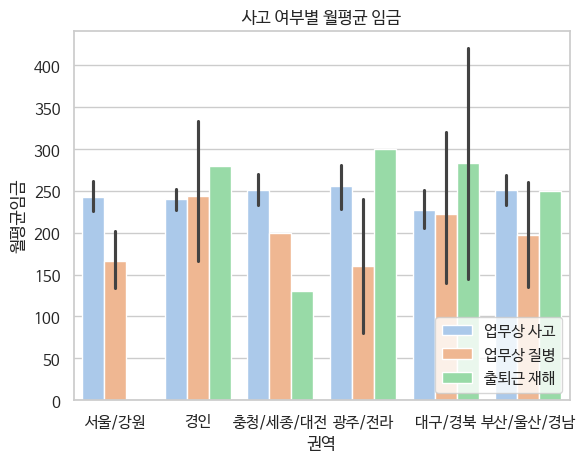

In [111]:
ax = sns.barplot(x = '권역', y = '월평균임금', data = df, hue = '사고여부',
palette = 'pastel') # palette 변경
ax.set_title('사고 여부별 월평균 임금') # 그래프 제목 추가
ax.set_xticks(range(0,6,1),
labels = ['서울/강원', '경인', '충청/세종/대전', '광주/전라', '대구/경북', '부산/울산/경남'])
# 범례 변경
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['업무상 사고', '업무상 질병', '출퇴근 재해'])
sns.move_legend(ax, 'lower right') # 범례 위치 변경
plt.show()

## 4.4 Scatterplot

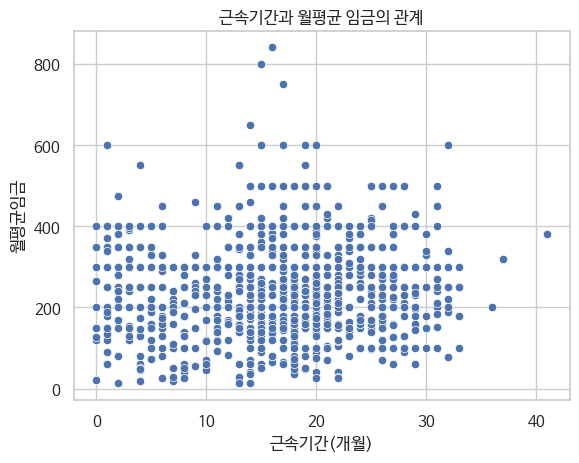

In [112]:
ax = sns.scatterplot(x = '근속기간(개월)', y = '월평균임금', data = df)
ax.set_title('근속기간과 월평균 임금의 관계') # 그래프 제목 추가
plt.show()

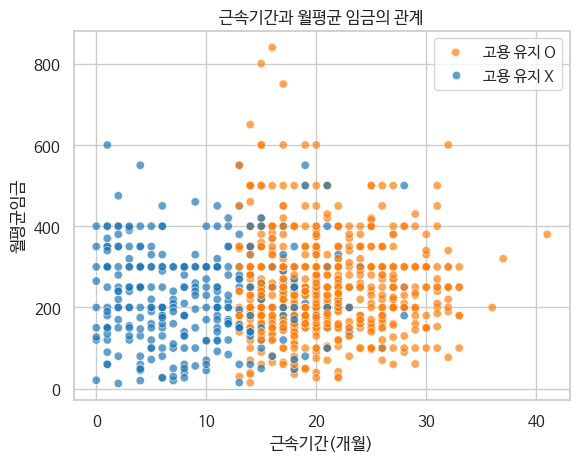

In [113]:
ax = sns.scatterplot(x = '근속기간(개월)', y = '월평균임금', data = df,
                     hue = '고용유지_여부', # 점의 색상을 그룹화할 변수 이름 지정
                     palette = 'tab10', # 색상 팔레트 지정
                     alpha = 0.7 # 점의 투명도 지정
)

ax.set_title('근속기간과 월평균 임금의 관계') # 그래프 제목 추가
# 범례 변경
ax.legend(labels=['고용 유지 O', '고용 유지 X'])
plt.show()


## 4.5 Histogram

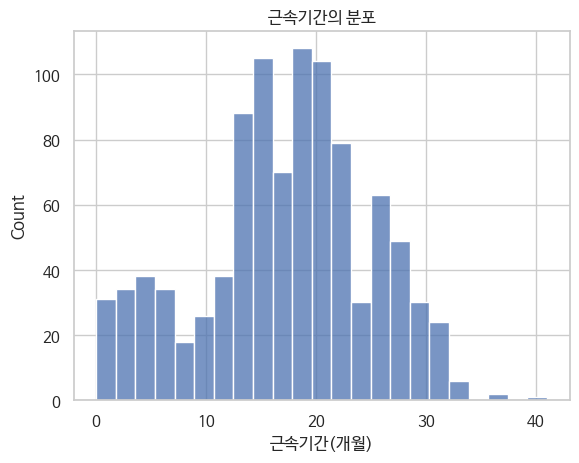

In [114]:
ax = sns.histplot(x = '근속기간(개월)', data = df)
ax.set_title('근속기간의 분포') # 그래프 제목 추가
plt.show()

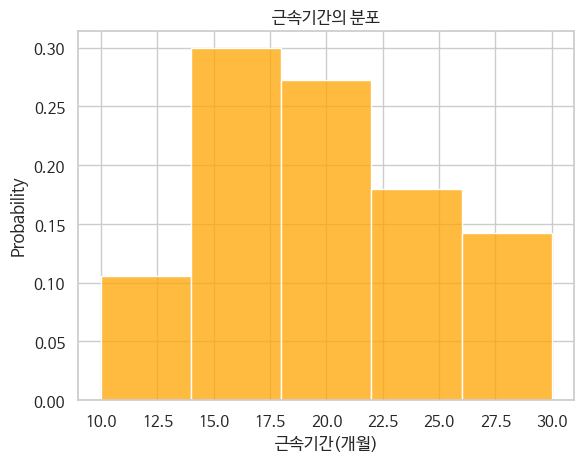

In [115]:
ax = sns.histplot(x = '근속기간(개월)', data = df,
                  bins = 5,             # 빈개수지정
                  binrange = (10, 30),  # x축 범위 지정
                  stat = 'probability', # y축 통계량 지정
                  color = 'orange'      # 색상 지정
)

ax.set_title('근속기간의 분포') # 그래프 제목 추가
plt.show()

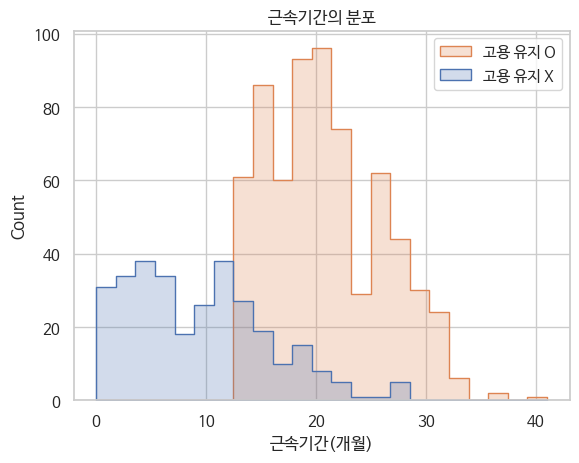

In [116]:
ax = sns.histplot(x = '근속기간(개월)', data = df,
                  hue = '고용유지_여부', # 그룹화할 변수 이름 지정
                  element = 'step' # 히스토그램 요소 지정
                  )
ax.set_title('근속기간의 분포') # 그래프 제목 추가
# 범례 변경
ax.legend(labels=['고용 유지 O', '고용 유지 X'])
plt.show()

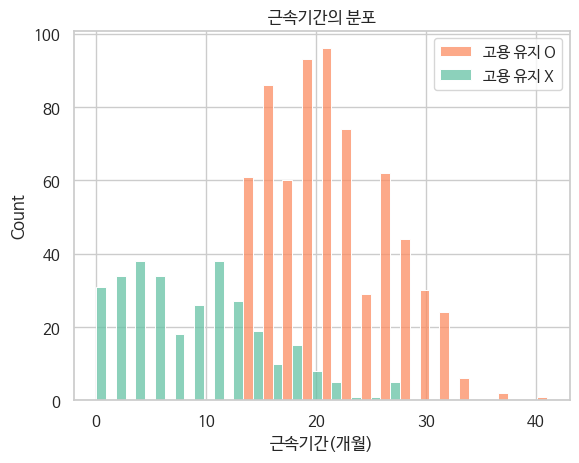

In [117]:
ax = sns.histplot(x = '근속기간(개월)', data = df,
                  hue = '고용유지_여부',  # 그룹화할 변수 이름 지정
                  multiple = 'dodge', # 스타일 지정
                  palette = 'Set2'    # 색상 팔레트 지정
)

ax.set_title('근속기간의 분포') # 그래프 제목 추가
# 범례 변경
ax.legend(labels=['고용 유지 O', '고용 유지 X'])
plt.show()